# 머신러닝 LSTM모델을 이용한 감성분석 진행 01

# 0905 머신러닝 모델 돌리기 

train/test data set : 현대쇼핑 + 네이버쿠팡 split 80:20

pred data set : 2020 cafe

lstm모델

In [2]:
import pandas as pd

## 01. 데이터 불러오기 확인

### - train data 1 : 현대 쇼핑

In [3]:
# Train 데이터 불러오기
train_df = pd.read_excel('train_data/naver_steam_hyundai_shop.xlsx',header=None)

In [4]:
train_df[0:3] # 데이터 확인 # 현대쇼핑 데이터는 부정이 0이고 긍정이 +1임을 확인하였음

,0,1
0,+@음침한 분위기+@기괴한 크리쳐들-@눈만 아픈 그래픽-@왜 넣었는지 모를 레터박...,0
1,+@음침한 분위기+@기괴한 크리쳐들-@눈만 아픈 그래픽-@왜 넣었는지 모를 레터박...,0
2,+@음침한 분위기+@기괴한 크리쳐들-@눈만 아픈 그래픽-@왜 넣었는지 모를 레터박...,1


In [52]:
train_df[1] = train_df[1].replace(0,-1) # 부정이 -1, 긍정이 1 로 바꾸어 준다.
train_df

,0,1
0,+@음침한 분위기+@기괴한 크리쳐들-@눈만 아픈 그래픽-@왜 넣었는지 모를 레터박...,-1
1,+@음침한 분위기+@기괴한 크리쳐들-@눈만 아픈 그래픽-@왜 넣었는지 모를 레터박...,-1
2,+@음침한 분위기+@기괴한 크리쳐들-@눈만 아픈 그래픽-@왜 넣었는지 모를 레터박...,1
3,+@음침한 분위기+@기괴한 크리쳐들-@눈만 아픈 그래픽-@왜 넣었는지 모를 레터박...,1
4,+@음침한 분위기+@기괴한 크리쳐들-@눈만 아픈 그래픽-@왜 넣었는지 모를 레터박...,1
...,...,...
356827,"- 7월 양산 시작한 광저우 oled 패널 공장, 이달부터 풀가동- 내년이면 55인...",1
356828,- 33분만 켜두면 995개,1
356829,- 2스테이지를 클리어 했다면 이 게임은 절반은 클리어 한거다!?! - 라스트 15...,1
356830,- 10점 만점 기준 - 댕댕이 같은 스토리 개연성과 엔딩 : - 20 일러스트 :...,1


<AxesSubplot:>

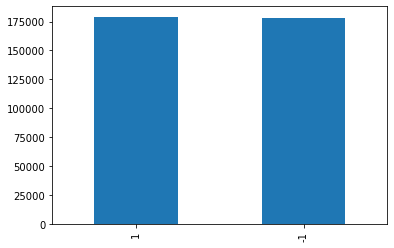

In [74]:
# train data의 긍부정 비율 확인 : 긍정1 / 중립0 / 부정 -1
%matplotlib inline 
import matplotlib.pyplot as plt

train_df[1].value_counts().plot(kind='bar')

### - train data 2 : 쿠팡

In [53]:
train_df_2 = pd.read_excel('train_data/coupang_naver_total/total_senti_coupang.xlsx') # 데이터 불러오기
print( len(train_df_2) )
train_df_2[0:3] # 확인

,Unnamed: 0,train,api,score
0,0,밥맛하면\n곰곰쌀이죠,neutral,0
1,1,비록 다이어트에 실패를 가져다 준\n곰곰쌀이지만\n맛있는 걸 오또케요\n진짜 최고입니다,positive,1
2,2,♡지난번 구입해서 먹고 다 먹어서\n또 구입했습니다,neutral,0


In [78]:
len(train_df_2)

15730

<AxesSubplot:>

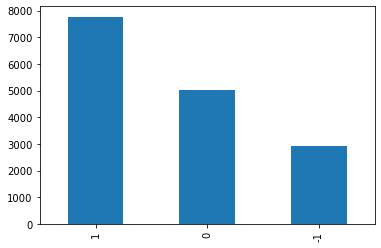

In [77]:
# train data의 긍부정 비율 확인 : 긍정1 / 중립0 / 부정 -1
%matplotlib inline 
import matplotlib.pyplot as plt

train_df_2['score'].value_counts().plot(kind='bar')

### - pred : 2020 카페

In [54]:
# pred 데이터 불러오기
pred_df = pd.read_excel('test_data/2020cafe_clean.xlsx') # header있음 # 전처리 완료된 데이터 문서단위임

In [55]:
# 데이터 확인
pred_df['content_clean']

0                    쌀구움과자  장여진  채미희 지음경향미디어메마른 쌀베이킹계의단...
1        먹던게있어서 식탁밑에 보관만하다가 개봉햇더니만 쌀이 눈에 보이게 딱 구분되어있는거 ...
2              어제 쌀이 똑 떨어져서    한인마트 가기는 너무 멀고 동네 수퍼 스토어...
3        가와지쌀 쌕깔이 원래 이렇개누리끼리한가요 살짝 푸루딩긴힌것같기도하고   쌀냄새도 쫌...
4        해원고 쌀꾸러미 한두달전에 받은듯해요얼마전 남은 쌀다먹고 5키로짜리 쌀 맛나게 잘먹...
                               ...                        
10000    친정에서 지난주에 쌀을가져왔는데  저희먹을거빼고 10키로짜리 2만원에판매합니다 와우...
10001    세상에 오대쌀 산지 이주된거같은데    지퍼백보관했고요 10키로 반반해서 하나는 실...
10002    인터넷검색하니  20배라해서  쌀가루 20그람에 물400넣고 이유식 돌리니    완...
10003     일반쌀 20    찹쌀 20   미개봉 상태인데 좀 오래되어서 가축 사료용으로 쓰...
10004     싱싱채소  햇고구마  감자 당근 호박 대파 쌀 배달해드려요        텃밭지키미...
Name: content_clean, Length: 10005, dtype: object

## 02. 데이터 전처리

##  - train data

In [56]:
# train 1 확인

# text 컬럼이 non-null인 샘플만 train_df에 다시 저장
train_df = train_df[train_df[0].notnull()]

# 수정된 train_df의 정보를 다시 확인
print(train_df.info())

# 분류 클래스의 구성을 확인
print(train_df[1].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356832 entries, 0 to 356831
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       356832 non-null  object
 1   1       356832 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.2+ MB
None
 1    179180
-1    177652
Name: 1, dtype: int64


In [57]:
# train 2 확인

# text 컬럼이 non-null인 샘플만 train_df에 다시 저장
train_df_2 = train_df_2[train_df_2['train'].notnull()]

# 수정된 train_df의 정보를 다시 확인
print(train_df_2.info())

# 분류 클래스의 구성을 확인
print(train_df_2['score'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15730 entries, 0 to 15729
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15730 non-null  int64 
 1   train       15730 non-null  object
 2   api         15730 non-null  object
 3   score       15730 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 614.5+ KB
None
 1    7771
 0    5035
-1    2924
Name: score, dtype: int64


### - train 합치기

In [58]:
len (train_df[0]), len(train_df_2['train'])

(356832, 15730)

In [59]:
# train_x 합치기
all_train_x_df= pd.concat( [train_df[0], train_df_2['train'] ], axis = 0)
all_train_x_df=all_train_x_df.reset_index()
all_train_x_df

,index,0
0,0,+@음침한 분위기+@기괴한 크리쳐들-@눈만 아픈 그래픽-@왜 넣었는지 모를 레터박...
1,1,+@음침한 분위기+@기괴한 크리쳐들-@눈만 아픈 그래픽-@왜 넣었는지 모를 레터박...
2,2,+@음침한 분위기+@기괴한 크리쳐들-@눈만 아픈 그래픽-@왜 넣었는지 모를 레터박...
3,3,+@음침한 분위기+@기괴한 크리쳐들-@눈만 아픈 그래픽-@왜 넣었는지 모를 레터박...
4,4,+@음침한 분위기+@기괴한 크리쳐들-@눈만 아픈 그래픽-@왜 넣었는지 모를 레터박...
...,...,...
372557,15725,2인이 살고 있는 집이구 저는 주말에만 빕에서 밥을 먹어서\n양이 좀 많은 편입니다
372558,15726,여름이라 더 작은거 사려다가 그냥 재구매했구요
372559,15727,밥맛은 좋아요
372560,15728,품질 관리 잘 하시는거 같아요


In [60]:
# train_y합치기
all_train_y_df= pd.concat( [train_df[1], train_df_2['score'] ], axis = 0)
all_train_y_df=all_train_y_df.reset_index()
all_train_y_df

,index,0
0,0,-1
1,1,-1
2,2,1
3,3,1
4,4,1
...,...,...
372557,15725,1
372558,15726,0
372559,15727,1
372560,15728,1


### - pred set 전처리

In [61]:
# pred에 str이 아닌게 존재하네! nan임을 확인함 # 제거하고 데이터 다시 가져옴
for i in range(len(pred_df)):
    if type(pred_df['content_clean'][i]) != str :
        print(i)

In [62]:
# 댓글이 있는 항목만 담기(빈 댓글 삭제)
# text 컬럼이 non-null인 샘플만 train_df에 다시 저장
pred_df = pred_df[pred_df['content_clean'].notnull()]

# 수정된 train_df의 정보를 다시 확인
print(pred_df.info())

# null값 개수 확인
print(pred_df['content_clean'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10005 non-null  int64 
 1   Unnamed: 0.1   10005 non-null  int64 
 2   title          10005 non-null  object
 3   nickname       10005 non-null  object
 4   date           10005 non-null  object
 5   content        10005 non-null  object
 6   comments       9665 non-null   object
 7   content_clean  10005 non-null  object
dtypes: int64(2), object(6)
memory usage: 703.5+ KB
None
0


### - pred: 문서 -> 문장
pred_df['content_clean'][0] # 문서단위로 존재함 -> 문장단위로 바꿈

In [63]:
# contents str로 처리
q= " "
for i in range(len(pred_df)):
    try:
     q += pred_df['content_clean'][i]
    except:
     pass

In [64]:
# 문장어미 구분자 대치
q = q.replace('네요','네요||-||').replace('하죠','하죠||-||').replace('데요','데요||-||').replace('이네요','이네요||-||')
q = q.replace('네요.','네요||-||').replace('되죠','되죠||-||').replace('대요','대요||-||').replace('이요','이요||-||')
q = q.replace('돼요.','돼요||-||').replace('되요','되요||-||').replace('다닙니다','다닙니다||-||').replace('입니다','입니다||-||')
q = q.replace('입니다.','입니다||-||').replace('니다','니다||-||').replace('중입니다','중입니다||-||').replace('입니다','입니다||-||')
q = q.replace('나요.','나요||-||').replace('어요','어요||-||').replace('까요','까요||-||').replace('에요','에요||-||')
q = q.replace('이에요','이에요||-||').replace('봐요','봐요||-||').replace('아요.','아요||-||').replace('와요','와요||-||')
q = q.replace('해요','해요||-||').replace('려요','려요||-||').replace('구요','구요||-||').replace('고요','고요||-||')
q = q.replace('죠','죠||-||').replace(':)','').replace('더라','더라||-||').replace('게요','게요||-||').replace('께요','께요||-||').replace('세요','세요||-||').replace('든요','든요||-||').replace('예요','예요||-||').replace('서요','서요||-||')
q = q.replace('않았다','않았다||-||').replace('었다','었다||-||').replace('있다','있다||-||').replace('이다','이다||-||').replace('싶다','싶다||-||').replace('않다','않다||-||').replace('되었다','되었다||-||').replace('아니다','아니다||-||')
q = q.replace('하자','하자||-||').replace('는다','는다||-||').replace('했다','했다||-||').replace('한다','한다||-||').replace('혔다','혔다||-||').replace('난다','난다||-||').replace('같아요','같아요||-||').replace('되었어','되었어||-||').replace('했어','했어||-||').replace('했지','했지||-||').replace('었어','었어||-||')

#특수문자 제거
q = q.replace('.','').replace('?','').replace('~','').replace('!','').replace('^','').replace('#','').replace('★','').replace('ㅋ','').replace('ㅜ','').replace('ㅠ','').replace('ㅎ','').replace('ㅏ','').replace('ㅡ','')

# 구분자로 문장 분리
p = q.split('||-||')
print ( '분리된 문장 수 : ',len(p), '// 이전 총 문자수 : ',len(q) ) 

# 각 문장을 데이터 프레임으로 저장
sentence_Data = pd.DataFrame({'content': p})
print ( len(sentence_Data) ) 
sentence_Data # pred할 셋 문장단위 설정 완

분리된 문장 수 :  48332 // 이전 총 문자수 :  2010402
48332


,content
0,쌀구움과자 장여진 채미희 지음경향미디어메마른 쌀베이킹계의...
1,쌀베이킹을 하면서밀베이킹과는 조금다른 결과물에당황할 때도 종종 있거든요
2,클래스를 다녀야하나 고민도해봤는데시간이 없는 저로썬 집에서 끙끙 앓고 있었는데너...
3,프롤로그 쌀베이킹을 시작한 이유에 대해 적혀져있어요
4,떡으로 시작해서 베이킹까지 여러재료를 활용하고 다양한 가루를사용하셨다고 해요
...,...
48327,...
48328,윤기 좔좔 맛있는 평택쌀 쌀 추청 20 58 000원 54 000...
48329,재난기금카드 돌봄쿠폰 카드결제 대면결제 계좌이체 온누리상품권 현금영수증 ...
48330,전화문의 010 2856 8020 계좌 582 12 053282 농협 장유...


### - 문장단위 데이터 전처리

In [65]:
# 2번 이상 중복인 데이터 확인
sentence = sentence_Data['content'].value_counts()
idx_sentence=sentence[sentence >= 2].index.tolist()
len(idx_sentence), idx_sentence

(684,
 ['',
  '요',
  '구요',
  '고요',
  '     공유소스 코드                                   주소복사     소스544   306740   416936   5261280   720복사      미지원으로        코드 퍼가기 기능은 더 이상 지원되지않습니다',
  ' 5분 이상 소요될 수 있으며  영상의 길이에 따라 소요 시간은 달라집니다',
  '360       도움말            멀티트랙의 트랙별 영상은 우측 관련영상에서 볼 수 있습니다',
  ' 안녕하세요',
  '  안녕하세요',
  '  감사합니다',
  '안녕하세요',
  ' 감사합니다',
  '   안녕하세요',
  '네요',
  '   감사합니다',
  '고 하네요',
  '  복지 질문 금지   일상 속 이야기들을 작성하는 게시판 입니다',
  '고 합니다',
  '당신의 한마디가 카페를 만들어갑니다',
  ' 질문의 정보가 부정확할 경우  제한된 답변을 받을 수 있습니다',
  ' 질문자 답변자 간의 기본매너를 지켜주세요',
  '    안녕하세요',
  '고 해요',
  '고 한다',
  '고 하더라',
  '  추천은 저에게 힘이 됩니다',
  '  문의는 댓글이나 문자 부탁합니다',
  '  백진주는 작년 출시후 올해 2월에 전량 판매 마감을 했습니다',
  '                                                         2            3                0   0                   0                    0                                                                               0 0 도움말라이센스                        4 17 48                  2020 2 12                 동영상 인코딩 중입니다',
  '

In [66]:
# 중복제거
data2 = sentence_Data
for i in idx_sentence:
    data2 = data2[sentence_Data['content'] != i] # 중복 완료해서 저장
# 데이터 사이즈 확인
print ('중복제거 전 데이터: ', len(sentence_Data), '중복제거완료 데이터: ', len(data2) ) #중복제거 전 데이터, 중복제거완료 데이터   
# null 확인
print( data2.isnull().sum() )

<ipython-input-66-2cf1e7073cf2>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2 = data2[sentence_Data['content'] != i] # 중복 완료해서 저장


중복제거 전 데이터:  48332 중복제거완료 데이터:  37243
content    0
dtype: int64


In [67]:
data2 # 인덱스 정렬 재필요해 보임

,content
0,쌀구움과자 장여진 채미희 지음경향미디어메마른 쌀베이킹계의...
1,쌀베이킹을 하면서밀베이킹과는 조금다른 결과물에당황할 때도 종종 있거든요
2,클래스를 다녀야하나 고민도해봤는데시간이 없는 저로썬 집에서 끙끙 앓고 있었는데너...
3,프롤로그 쌀베이킹을 시작한 이유에 대해 적혀져있어요
4,떡으로 시작해서 베이킹까지 여러재료를 활용하고 다양한 가루를사용하셨다고 해요
...,...
48327,...
48328,윤기 좔좔 맛있는 평택쌀 쌀 추청 20 58 000원 54 000...
48329,재난기금카드 돌봄쿠폰 카드결제 대면결제 계좌이체 온누리상품권 현금영수증 ...
48330,전화문의 010 2856 8020 계좌 582 12 053282 농협 장유...


In [68]:
data_content = data2[['content']].dropna(axis=0) # null 제거
data_content.reset_index(drop=True, inplace=True) # 인덱스 재정렬
data_content

,content
0,쌀구움과자 장여진 채미희 지음경향미디어메마른 쌀베이킹계의...
1,쌀베이킹을 하면서밀베이킹과는 조금다른 결과물에당황할 때도 종종 있거든요
2,클래스를 다녀야하나 고민도해봤는데시간이 없는 저로썬 집에서 끙끙 앓고 있었는데너...
3,프롤로그 쌀베이킹을 시작한 이유에 대해 적혀져있어요
4,떡으로 시작해서 베이킹까지 여러재료를 활용하고 다양한 가루를사용하셨다고 해요
...,...
37238,...
37239,윤기 좔좔 맛있는 평택쌀 쌀 추청 20 58 000원 54 000...
37240,재난기금카드 돌봄쿠폰 카드결제 대면결제 계좌이체 온누리상품권 현금영수증 ...
37241,전화문의 010 2856 8020 계좌 582 12 053282 농협 장유...


In [69]:
# pred에 str이 아닌게 존재하네! nan임을 확인함 # 제거하고 데이터 다시 가져옴
for i in range(len(data2)):
    if type(data_content['content'][i]) != str :
        print(i) # null없음 확인 땅땅!

## 03. train / test 분리

In [254]:
# Train용 데이터셋과 Test용 데이터 셋 분리
# 예측력을 높이기 위해 수집된 데이터를 학습용과 테스트 용으로 분리하여 진행

from sklearn.model_selection import train_test_split
# train_x, test_x, train_y, test_y = train_test_split(train_df[0], train_df[1] , test_size=0.2, random_state=0)  # 현대만 학습
train_x, test_x, train_y, test_y = train_test_split(all_train_x_df[0], all_train_y_df[0] , test_size=0.2, random_state=0) # 현대 쿠팡학습

print(len(train_x), len(train_y), len(test_x), len(test_y))

298049 298049 74513 74513


<AxesSubplot:>

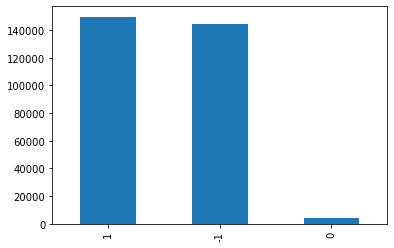

In [72]:
# train data의 긍부정 비율 확인 : 긍정1 / 중립0 / 부정 -1
%matplotlib inline 
import matplotlib.pyplot as plt

train_y.value_counts().plot(kind='bar')

## 04. 토큰화 및 벡터화

### - 토큰화

In [84]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [87]:
import konlpy 
from konlpy.tag import Okt 
okt = Okt() 
X_train = [] 
for sentence in train_x:
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
    X_train.append(temp_X) 
    
X_test = [] 
for sentence in test_x:
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
    X_test.append(temp_X)


In [88]:
print(X_train[:3]) # 확인

[['캠핑', '가다', '자다', '사용', '!'], ['너무', '좋다', '지금', '바로', '구매', '아이스', '아메리카노', '베다', '티', '로', '시원하다', '말다', '있다', 'ㅎ', '다음', '또', '구매'], ['롤']]


### - 정수 인코딩

In [89]:
# 정수 인코딩
from keras.preprocessing.text import Tokenizer 
max_words = 35000 
tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(X_train) 
X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)

### - 데이터 분포확인

train 최대 길이 :  3291
train 평균 길이 :  13.917956443403602


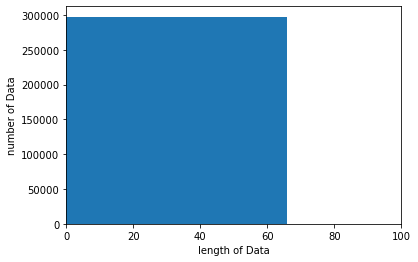

In [97]:
print("train 최대 길이 : ", max(len(l) for l in X_train)) 
print("train 평균 길이 : ", sum(map(len, X_train))/ len(X_train)) 

plt.xlim([0, 100]) 
plt.hist([len(s) for s in X_train], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()

test 최대 길이 :  463
test 평균 길이 :  13.848254666970863


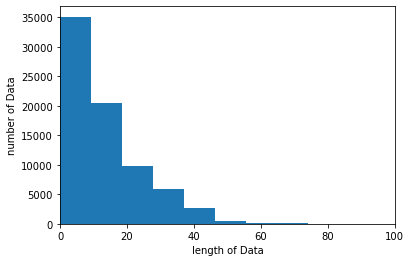

In [98]:
print("test 최대 길이 : ", max(len(l) for l in X_test)) 
print("test 평균 길이 : ", sum(map(len, X_test))/ len(X_test)) 

plt.xlim([0, 100]) 
plt.hist([len(s) for s in X_test], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()

In [103]:
# one- hot  encoding
import numpy as np 
y_train = [] 
y_test = [] 

for i in range(len(train_y)):
    if train_y.iloc[i] == 1: 
        y_train.append([0, 0, 1]) 
    elif train_y.iloc[i] == 0: 
        y_train.append([0, 1, 0]) 
    elif train_y.iloc[i] == -1: 
        y_train.append([1, 0, 0]) 

for i in range(len(test_y)): 
    if test_y.iloc[i] == 1: 
        y_test.append([0, 0, 1]) 
    elif test_y.iloc[i] == 0: 
        y_test.append([0, 1, 0]) 
    elif test_y.iloc[i] == -1: 
        y_test.append([1, 0, 0]) 
        
y_train = np.array(y_train) 
y_test = np.array(y_test)

## 05. 모델 생성

In [104]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences
max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 
 
X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)

In [105]:
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax')) 

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])  #optimizer: rmsprop
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
26825/26825 [==============================] - 528s 19ms/step - loss: 0.4492 - accuracy: 0.8079 - val_loss: 0.3917 - val_accuracy: 0.8436
Epoch 2/10
26825/26825 [==============================] - 505s 19ms/step - loss: 0.3736 - accuracy: 0.8512 - val_loss: 0.3844 - val_accuracy: 0.8472
Epoch 3/10
26825/26825 [==============================] - 526s 20ms/step - loss: 0.3607 - accuracy: 0.8587 - val_loss: 0.3833 - val_accuracy: 0.8489
Epoch 4/10
26825/26825 [==============================] - 536s 20ms/step - loss: 0.3536 - accuracy: 0.8627 - val_loss: 0.3823 - val_accuracy: 0.8503
Epoch 5/10
26825/26825 [==============================] - 549s 20ms/step - loss: 0.3488 - accuracy: 0.8670 - val_loss: 0.3970 - val_accuracy: 0.8520
Epoch 6/10
26825/26825 [==============================] - 579s 22ms/step - loss: 0.3454 - accuracy: 0.8698 - val_loss: 0.3827 - val_accuracy: 0.8509
Epoch 7/10
26825/26825 [==============================] - 643s 24ms/step - loss: 0.3443 - accuracy: 0.8711

In [106]:
print('정확도 : {:.2f}%'.format(model.evaluate(X_test, y_test)[1]*100 ))

2329/2329 [==============================] - 13s 5ms/step - loss: 0.4052 - accuracy: 0.8473
정확도 : 84.73%


In [188]:
model2 = Sequential() 
model2.add(Embedding(max_words, 100)) 
model2.add(LSTM(128)) 
model2.add(Dense(3, activation='softmax')) 

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model2.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
26825/26825 [==============================] - 1319s 49ms/step - loss: 0.4249 - accuracy: 0.8159 - val_loss: 0.3528 - val_accuracy: 0.8518
Epoch 2/10
26825/26825 [==============================] - 1581s 59ms/step - loss: 0.3057 - accuracy: 0.8752 - val_loss: 0.3418 - val_accuracy: 0.8574
Epoch 3/10
26825/26825 [==============================] - 2030s 76ms/step - loss: 0.2577 - accuracy: 0.8975 - val_loss: 0.3454 - val_accuracy: 0.8566
Epoch 4/10
26825/26825 [==============================] - 1265s 47ms/step - loss: 0.2165 - accuracy: 0.9161 - val_loss: 0.3735 - val_accuracy: 0.8507
Epoch 5/10
26825/26825 [==============================] - 1254s 47ms/step - loss: 0.1802 - accuracy: 0.9321 - val_loss: 0.4075 - val_accuracy: 0.8466
Epoch 6/10
26825/26825 [==============================] - 1159s 43ms/step - loss: 0.1445 - accuracy: 0.9466 - val_loss: 0.4522 - val_accuracy: 0.8422
Epoch 7/10
26825/26825 [==============================] - 1257s 47ms/step - loss: 0.1171 - accuracy:

In [192]:
print('정확도 : {:.2f}%'.format(model2.evaluate(X_test, y_test)[1]*100 ))

2329/2329 [==============================] - 33s 14ms/step - loss: 0.6969 - accuracy: 0.8297
정확도 : 82.97%


## 07. 실제 test 값 매핑 확인

In [125]:
predict = model.predict(X_test) # x_test로 예측하기 이를 

In [122]:
predict_labels = np.argmax(predict, axis=1) 
original_labels = np.argmax(y_test, axis=1)

In [114]:
st, origin, pred =[],[],[]
# 예시로 30개만 뽑아 데이터 직접 비교해보기
for i in range(30): 
    st.append( test_x.iloc[i] ) ,
    origin.append( original_labels[i]) , 
    pred.append( predict_labels[i])
    
# 데이터프레임 만들기
ex_30 = pd.DataFrame({'문장' : st , '원래라벨' :origin , '예측': pred  })
ex_30

,문장,원래라벨,예측
0,생각보다 타이트한거같은데 이쁘네요,2,2
1,곰곰 브랜드가 생기고 나서 다른 제품들도 애용하지만 쌀은 꼭 곰곰으로 삽니다,1,2
2,\n포장은 일반 쌀과는 좀 다르게\n비닐에 포장되어 있습니다,1,1
3,콜 오브 듀티는 이제 나에겐 멀티 하려고 사는 게임이 되어버렸지만 트레이 아크 콜옵...,2,2
4,70% 세일 눈물 날 정도의 압도적 감사 8은 내스타일이 아니라서,2,0
5,파스가 이렇게 시원할줄 예상 못했는데 너무 좋아요!! 요즘 운동시작해서 근육통 달고...,2,2
6,무려 20년전의 명작이라는 부분을 감안해야 합니다. 수퍼마리오나 록맨 시대 직후의 ...,0,0
7,처음엔 편한거 같더니 조금 안고 있으면 어깨가 아파요ㅠㅠ아기 다리에 자국도 나구요,2,0
8,"분위기랑 ost랑 김지수도 너무 예쁘게 나오고 괜찮았는데, 내용이 약간 공감불가.",0,2
9,쌀눈은 찾아보기 어려워요,0,2


In [145]:
for i in range(30):
    if ex_30['원래라벨'][i] == 2 :  
        print ( i, "번째 문장: ",  ex_30['문장'][i], '|||', ex_30['원래라벨'][i], ': 원래 | 예측 :', ex_30['예측'][i] )

# 2가 긍정 / 1이 중립 / 0이 부정임을 확인

0 번째 문장:  생각보다 타이트한거같은데 이쁘네요 ||| 2 : 원래 | 예측 : 2
3 번째 문장:  콜 오브 듀티는 이제 나에겐 멀티 하려고 사는 게임이 되어버렸지만 트레이 아크 콜옵만의 찰진맛이 있음 아... 최대의 단점은 밀리어택이 두방으로 변한것.... 그리고 상자무기 왜 나온거냐.... ||| 2 : 원래 | 예측 : 2
4 번째 문장:  70% 세일 눈물 날 정도의 압도적 감사 8은 내스타일이 아니라서 ||| 2 : 원래 | 예측 : 0
5 번째 문장:  파스가 이렇게 시원할줄 예상 못했는데 너무 좋아요!! 요즘 운동시작해서 근육통 달고 사는데 이거 붙이니까 시원하게 잘 풀리네요. 만족입니다!♡ ||| 2 : 원래 | 예측 : 2
7 번째 문장:  처음엔 편한거 같더니 조금 안고 있으면 어깨가 아파요ㅠㅠ아기 다리에 자국도 나구요 ||| 2 : 원래 | 예측 : 0
11 번째 문장:  만좋합니다 좋습니다어ㅏ ||| 2 : 원래 | 예측 : 2
13 번째 문장:  그래픽도 그렇지만, 게임 자체의 속도감도 느림. 후반으로 갈수록 지랄맞아지는 난이도하며, 우리 성벽은 왜 이리 잘 부숴지고 불타는지 모르겠음 두어판 하고나면 두세시간 훅 지나가는데 엄청 피곤하기까지 함. 그런데도 이상하게 계속 하게 되는 게임. ||| 2 : 원래 | 예측 : 0
14 번째 문장:  역시 인터넷으로 사니 다양한 크기와 종류 한꺼번에 살 수 있어 좋아요~마트에서는 비싸게 파는 지퍼백 살림하다봄 지퍼백 아주 유용하게 쓰지요~ 슬라이드지퍼백 이중지퍼백 특히 스탠드지퍼백은 세워 놓을 수 있어 너무 좋아요 ~진짜 굿이에요 ||| 2 : 원래 | 예측 : 2
16 번째 문장:  다크닝없이 처음 색상 그대로 유지되어 좋았어요 큰 불만없이 오래 쓸수있을것같아요~ ||| 2 : 원래 | 예측 : 2
19 번째 문장:   깨진 쌀알도 별로 없고 순정으로 밥을 지어 보았는데
윤기가 흐르고 밥맛도 좋네요 ||| 2 : 원래 | 예측 : 2
20 번째 문장:  리모컨이 다소 불편하지만 설치쉽고 공

In [146]:
for i in range(30):
    if ex_30['원래라벨'][i] !=  ex_30['예측'][i] : 
        print ( i, "번째 문장: ",  ex_30['문장'][i], '|||', ex_30['원래라벨'][i], ': 원래 | 예측 :', ex_30['예측'][i] )

1 번째 문장:   곰곰 브랜드가 생기고 나서 다른 제품들도 애용하지만 쌀은 꼭 곰곰으로 삽니다 ||| 1 : 원래 | 예측 : 2
4 번째 문장:  70% 세일 눈물 날 정도의 압도적 감사 8은 내스타일이 아니라서 ||| 2 : 원래 | 예측 : 0
7 번째 문장:  처음엔 편한거 같더니 조금 안고 있으면 어깨가 아파요ㅠㅠ아기 다리에 자국도 나구요 ||| 2 : 원래 | 예측 : 0
8 번째 문장:  분위기랑 ost랑 김지수도 너무 예쁘게 나오고 괜찮았는데, 내용이 약간 공감불가. ||| 0 : 원래 | 예측 : 2
9 번째 문장:   쌀눈은 찾아보기 어려워요 ||| 0 : 원래 | 예측 : 2
13 번째 문장:  그래픽도 그렇지만, 게임 자체의 속도감도 느림. 후반으로 갈수록 지랄맞아지는 난이도하며, 우리 성벽은 왜 이리 잘 부숴지고 불타는지 모르겠음 두어판 하고나면 두세시간 훅 지나가는데 엄청 피곤하기까지 함. 그런데도 이상하게 계속 하게 되는 게임. ||| 2 : 원래 | 예측 : 0
21 번째 문장:  09년에 시작해서 10년 지난 지금도 보로스 못깸 ||| 2 : 원래 | 예측 : 0
23 번째 문장:  괜찮은 무료게임 더 이상은 생략한다............... ||| 2 : 원래 | 예측 : 0
25 번째 문장:  게임을 위장삼아 박치인지 아닌지 가려내는 프로그램. + 저는 박치였습니다. + 사운드트랙 들으며 바닥 타일을 뛰는 나. ||| 2 : 원래 | 예측 : 0


## 08. 진짜 pred set 확인해보기

In [149]:
data_content['content'] # pred할 데이터 

0                     쌀구움과자  장여진  채미희 지음경향미디어메마른 쌀베이킹계의...
1                  쌀베이킹을 하면서밀베이킹과는 조금다른 결과물에당황할 때도 종종 있거든요
2          클래스를 다녀야하나 고민도해봤는데시간이 없는 저로썬 집에서 끙끙 앓고 있었는데너...
3                             프롤로그 쌀베이킹을 시작한 이유에 대해 적혀져있어요
4              떡으로 시작해서 베이킹까지  여러재료를 활용하고 다양한 가루를사용하셨다고 해요
                               ...                        
37238                                                  ...
37239        윤기 좔좔 맛있는 평택쌀   쌀 추청 20    58 000원  54 000...
37240         재난기금카드 돌봄쿠폰 카드결제 대면결제 계좌이체 온누리상품권  현금영수증 ...
37241        전화문의 010 2856 8020 계좌  582 12 053282 농협 장유...
37242                                                     
Name: content, Length: 37243, dtype: object

In [163]:
# pred 토큰화 벡터화
X_pred = [] 
for sentence in data_content['content'] :
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
    X_pred.append(temp_X) 


In [164]:
# 정수 인코딩
tokenizer.fit_on_texts(X_pred ) 
X_pred  = tokenizer.texts_to_sequences(X_pred ) 

pred 최대 길이 :  306
pred 평균 길이 :  13.30099616035228


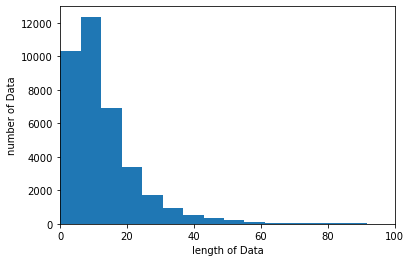

In [165]:
# pred 길이 확인
print("pred 최대 길이 : ", max(len(l) for l in X_pred)) 
print("pred 평균 길이 : ", sum(map(len, X_pred))/ len(X_pred)) 

plt.xlim([0, 100]) 
plt.hist([len(s) for s in X_pred], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()

In [166]:
# 데이터 길이 맞추기 : padding  씌움
X_pred = pad_sequences(X_pred, maxlen=max_len)

pred 최대 길이 :  20
pred 평균 길이 :  20.0


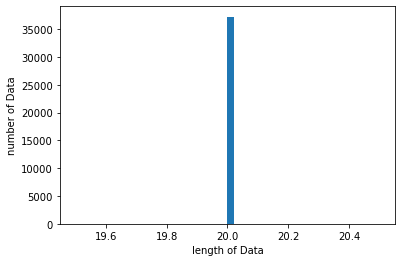

In [167]:
# pred 확인
print("pred 최대 길이 : ", max(len(l) for l in X_pred)) 
print("pred 평균 길이 : ", sum(map(len, X_pred))/ len(X_pred)) 

plt.hist([len(s) for s in X_pred], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()

In [169]:
# 2020 카페 pred로 감성분석 예측
predict = model.predict( X_pred )

In [178]:
pred_df['content']

0        #RICEBAKING#쌀구움과자→←장여진, 채미희 지음경향미디어메마른 쌀베이킹계의단...
1        먹던게있어서 식탁밑에 보관만하다가 개봉햇더니만ᆢ쌀이 눈에 보이게 딱 구분되어있는거 ...
2              어제 쌀이 똑 떨어져서 ...한인마트 가기는 너무 멀고 동네 수퍼 스토어...
3        가와지쌀 쌕깔이 원래 이렇개누리끼리한가요?살짝 푸루딩긴힌것같기도하고.. 쌀냄새도 쫌...
4        해원고 쌀꾸러미 한두달전에 받은듯해요얼마전 남은 쌀다먹고 5키로짜리 쌀 맛나게 잘먹...
                               ...                        
10000    친정에서 지난주에 쌀을가져왔는데 \n저희먹을거빼고 10키로짜리 2만원에판매합니다\n...
10001    세상에 오대쌀 산지 이주된거같은데..ㅠ\n지퍼백보관했고요\n10키로 반반해서 하나는...
10002    인터넷검색하니\n\n20배라해서\n\n쌀가루 20그람에 물400넣고 이유식 돌리니ㅠ...
10003     일반쌀 20kg, 찹쌀 20kg 미개봉 상태인데 좀 오래되어서 가축 사료용으로 쓰...
10004    [싱싱채소] 햇고구마, 감자,당근,호박,대파,쌀 배달해드려요~\n~~~~~~텃밭지키...
Name: content, Length: 10005, dtype: object

In [187]:
predict_labels = np.argmax(predict, axis=1) 

st, origin, pred =[],[],[]
# 예시로 30개만 뽑아 데이터 직접 비교해보기
for i in range(300): 
    st.append( pred_df['content'].iloc[i] ) ,
    pred.append( predict_labels[i])

# 2가 긍정 / 1이 중립 / 0이 부정임을 확인
#0,1,2로 이루어진 pred -1, 0 ,1 로바꾸기
pnr=[]
for i in range(len(pred)):
    if pred[i] == 0:
        pnr.append(-1)
    elif pred[i] ==1:
        pnr.append(0)
    else:
        pnr.append(1)
    
# 데이터프레임 만들기
ex_300 = pd.DataFrame({'문장' : st , '감성':pnr ,'분류:': pred })
ex_300

,문장,감성,분류:
0,"#RICEBAKING#쌀구움과자→←장여진, 채미희 지음경향미디어메마른 쌀베이킹계의단...",-1,0
1,먹던게있어서 식탁밑에 보관만하다가 개봉햇더니만ᆢ쌀이 눈에 보이게 딱 구분되어있는거 ...,-1,0
2,어제 쌀이 똑 떨어져서 ...한인마트 가기는 너무 멀고 동네 수퍼 스토어...,-1,0
3,가와지쌀 쌕깔이 원래 이렇개누리끼리한가요?살짝 푸루딩긴힌것같기도하고.. 쌀냄새도 쫌...,-1,0
4,해원고 쌀꾸러미 한두달전에 받은듯해요얼마전 남은 쌀다먹고 5키로짜리 쌀 맛나게 잘먹...,-1,0
...,...,...,...
295,원래 현미쌀 먹는데 애기가 유아식하는데 현미쌀주면 자꾸 헛구역질해서 요새 쌀밥만했는...,1,2
296,럭키는 아토피가 좀 있어서밀가루 음식을 먹이면 안되서 조심하고 있어요그런데 다른 ...,1,2
297,학교에서온건데 쌀이미 친정에서줘서 많아서팔아요~~10키로이구요서리태500그람까지같이...,1,2
298,제가 이용하는 곳에서는 이제 품절이래요 ㅜ또 어디서 백진주쌀 주문해드세요? 전 찰진...,1,2


In [186]:
ex_300.to_excel('pred_lstm_pnr.xlsx',encoding='utf-8')

# 0906 LSTM 모델을 이용한 감성분석 
: 데이터 2015 / 2020 데이터 예측 비교

## 모델1과 2 모두 실행 하여 pred_data 폴더에 모든 데이터 저장
train/test: 현대쇼핑 + 쿠팡  80:20

pred: 2015 blog / 2015 cafe  //2020 blog / 2020 cafe

In [ ]:
for num in range(4): #4번 반복 작업수행
# 데이터 지정 
  if num ==0: # 2020blog
    pred_df = pd.read_excel('test_data/0902_2020_blog.xlsx') # header있음 # 전처리 완료된 데이터 문서단위임
    pred_df0= pred_df
  if num ==1: # 2020cafe
    pred_df = pd.read_excel('test_data/2020cafe_clean.xlsx') # header있음 # 전처리 완료된 데이터 문서단위임
    pred_df1= pred_df
  if num ==2: # 2015blog
    pred_df = pd.read_excel('test_data/0902_2015_blog.xlsx') # header있음 # 전처리 완료된 데이터 문서단위임
    pred_df2= pred_df
  if num ==3: # 2015 cafe
    pred_df = pd.read_excel('test_data/0902_2015_cafe.xlsx') # header있음 # 전처리 완료된 데이터 문서단위임
    pred_df3= pred_df

#데이터 전처리
  # contents str로 처리
  q= " "
  for i in range(len(pred_df)):
      try:
        q += pred_df['content'][i]  
      except:
        pass

  # 문장어미 구분자 대치
  q = q.replace('네요','네요||-||').replace('하죠','하죠||-||').replace('데요','데요||-||').replace('이네요','이네요||-||')
  q = q.replace('네요.','네요||-||').replace('되죠','되죠||-||').replace('대요','대요||-||').replace('이요','이요||-||')
  q = q.replace('돼요.','돼요||-||').replace('되요','되요||-||').replace('다닙니다','다닙니다||-||').replace('입니다','입니다||-||')
  q = q.replace('입니다.','입니다||-||').replace('니다','니다||-||').replace('중입니다','중입니다||-||').replace('입니다','입니다||-||')
  q = q.replace('나요.','나요||-||').replace('어요','어요||-||').replace('까요','까요||-||').replace('에요','에요||-||')
  q = q.replace('이에요','이에요||-||').replace('봐요','봐요||-||').replace('아요.','아요||-||').replace('와요','와요||-||')
  q = q.replace('해요','해요||-||').replace('려요','려요||-||').replace('구요','구요||-||').replace('고요','고요||-||')
  q = q.replace('죠','죠||-||').replace(':)','').replace('더라','더라||-||').replace('게요','게요||-||').replace('께요','께요||-||').replace('세요','세요||-||').replace('든요','든요||-||').replace('예요','예요||-||').replace('서요','서요||-||')
  q = q.replace('않았다','않았다||-||').replace('었다','었다||-||').replace('있다','있다||-||').replace('이다','이다||-||').replace('싶다','싶다||-||').replace('않다','않다||-||').replace('되었다','되었다||-||').replace('아니다','아니다||-||')
  q = q.replace('하자','하자||-||').replace('는다','는다||-||').replace('했다','했다||-||').replace('한다','한다||-||').replace('혔다','혔다||-||').replace('난다','난다||-||').replace('같아요','같아요||-||').replace('되었어','되었어||-||').replace('했어','했어||-||').replace('했지','했지||-||').replace('었어','었어||-||')

  #특수문자 제거
  q = q.replace('.','').replace('?','').replace('~','').replace('!','').replace('^','').replace('#','').replace('★','').replace('ㅋ','').replace('ㅜ','').replace('ㅠ','').replace('ㅎ','').replace('ㅏ','').replace('ㅡ','')

  # 구분자로 문장 분리
  p = q.split('||-||')
  print ( '분리된 문장 수 : ',len(p), '// 이전 총 문자수 : ',len(q) ) 

  # 각 문장을 데이터 프레임으로 저장
  sentence_Data = pd.DataFrame({'content': p})
  print ( len(sentence_Data) ) 
  sentence_Data # pred할 셋 문장단위 설정 완

# 2번 이상 중복인 데이터 확인
  sentence = sentence_Data['content'].value_counts()
  idx_sentence=sentence[sentence >= 2].index.tolist()
  len(idx_sentence), idx_sentence

# 중복제거
  data2 = sentence_Data
  for i in idx_sentence:
      data2 = data2[sentence_Data['content'] != i] # 중복 완료해서 저장
  # 데이터 사이즈 확인
  print ('중복제거 전 데이터: ', len(sentence_Data), '중복제거완료 데이터: ', len(data2) ) #중복제거 전 데이터, 중복제거완료 데이터   

# null 제거
  data_content = data2[['content']].dropna(axis=0) # null 제거
  data_content.reset_index(drop=True, inplace=True) # 인덱스 재정렬
  data_content

#pred의 data_content 저장
  data_content.to_excel(f'test_data/st_pred/pred_naver_sentence{num}.xlsx',encoding='utf-8')

  # pred 토큰화 벡터화
  X_pred = [] 
  for sentence in data_content['content'] :
      temp_X = [] 
      temp_X = okt.morphs(sentence, stem=True) # 토큰화 
      temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
      X_pred.append(temp_X) 

#벡터, 토큰화   
  # 정수 인코딩
  tokenizer.fit_on_texts(X_pred ) 
  X_pred  = tokenizer.texts_to_sequences(X_pred ) 

  # 데이터 길이 맞추기 : padding  씌움
  X_pred = pad_sequences(X_pred, maxlen=max_len)

##model1으로 해보기
  # pred로 감성분석 예측
  predict = model.predict( X_pred )
  predict_labels = np.argmax(predict, axis=1) 

  ## 데이터 확인 
  st, origin, pred =[],[],[]
  # 데이터 직접 비교해보기
  for i in range( len(data_content) ): 
      st.append( data_content['content'].iloc[i] ) ,
      pred.append( predict_labels[i])

  # 2가 긍정 / 1이 중립 / 0이 부정임을 확인
  #0,1,2로 이루어진 pred -1, 0 ,1 로바꾸기
  pnr=[]
  for i in range(len(pred)):
      if pred[i] == 0:
          pnr.append(-1)
      elif pred[i] ==1:
          pnr.append(0)
      else:
          pnr.append(1)
      
  # 데이터프레임 만들기
  total_ex = pd.DataFrame({'문장' : st , '감성':pnr ,'분류:': pred })
  total_ex

  #엑셀로 저장
  total_ex.to_excel(f'pred_data/pred_lstm_pnr_md1_{num}.xlsx',encoding='utf-8')

## model2로도 해보기!
  # pred로 감성분석 예측
  predict2 = model.predict( X_pred )
  predict_labels2 = np.argmax(predict2, axis=1) 

  ## 전체 데이터 확인 
  st, origin, pred =[],[],[]
  # 데이터 직접 비교해보기
  for i in range( len(data_content) ): 
      st.append( data_content['content'].iloc[i] ) ,
      pred.append( predict_labels2[i])

  # 2가 긍정 / 1이 중립 / 0이 부정임을 확인
  #0,1,2로 이루어진 pred -1, 0 ,1 로바꾸기
  pnr=[]
  for i in range(len(pred)):
      if pred[i] == 0:
          pnr.append(-1)
      elif pred[i] ==1:
          pnr.append(0)
      else:
          pnr.append(1)
      
  # 데이터프레임 만들기
  total_ex = pd.DataFrame({'문장' : st , '감성':pnr ,'분류:': pred })
  total_ex

  #엑셀로 저장
  total_ex.to_excel(f'pred_data/pred_lstm_md2_pnr_{num}.xlsx',encoding='utf-8')

# 0906 머신러닝 test 셋 교체해서 모델 정확도 평가 다시 진행해보기

train data : 현대쇼핑 + 쿠팡

test : 우리가 다수결로 판단한 긍부정 300문장

pred: 2020 cafe

In [206]:
# 데이터 불러오기
retest_data = pd.read_excel('test_data/retest300st.xlsx')
retest_data

,content,date,test
0,혹시 어떻게 입력하셨는지 알려주세요,2020.06.16,중립
1,냄새도 구수 찰기도 굿 밥맛도 좋네요,2020.12.26.,긍정
2,미리 주문을해두자해서 트레이더스에 주문을 했는데 배송이 금요일로 되더라,2020.02.26,중립
3,20 다 버리려면 아깝기도 하고 어디 모이라도 기부할데 없나요 벌레가 많아서 모이로...,2020.09.18.,부정
4,눈금이 800 부터인걸보니 아무리 적게만들어도 800 인가봐요,2020.10.03.,중립
...,...,...,...
295,껍질이 얇고 촉촉보들보들한 쌀식빵 만들었어요,2020.11.23.,긍정
296,여유가있어 하나만 내놓아요8 만원이요,2020.07.30,중립
297,생선에도 전날 미리 소금 밑간을 해 놓으니 비린내도 잡아주고 감칠맛이 좋아졌어요,2020.09.22.,긍정
298,낼 아침밥 예약해두려구요,2020.03.22,중립


In [214]:
# retest_data의 test 칼럼을 긍정 1, 중립0 부정 -1로 교체
y_score=[]
for i in range(len(retest_data)):
    if retest_data['test'][i] == '부정':
        y_score.append(-1)
    elif retest_data['test'][i] == '중립':
        y_score.append(0)
    else:
        y_score.append(1)

In [281]:
# test_x와 test_y 교체

test_x = retest_data['content']
test_y = y_score

print(len(train_x), len(train_y), len(test_x), len(test_y))
print(type(train_x), type(train_y), type(test_x), type(test_y))

298049 298049 300 300
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'list'>


### - 데이터 정제

In [284]:
test_x = retest_data['content'].astype(str)
test_x

0                                    혹시 어떻게 입력하셨는지 알려주세요
1                                   냄새도 구수 찰기도 굿 밥맛도 좋네요
2                미리 주문을해두자해서 트레이더스에 주문을 했는데 배송이 금요일로 되더라
3      20 다 버리려면 아깝기도 하고 어디 모이라도 기부할데 없나요 벌레가 많아서 모이로...
4                     눈금이 800 부터인걸보니 아무리 적게만들어도 800 인가봐요
                             ...                        
295                             껍질이 얇고 촉촉보들보들한 쌀식빵 만들었어요
296                                 여유가있어 하나만 내놓아요8 만원이요
297         생선에도 전날 미리 소금 밑간을 해 놓으니 비린내도 잡아주고 감칠맛이 좋아졌어요
298                                        낼 아침밥 예약해두려구요
299                어제 저녁 대신 먹고 간식으로 먹고 하다보니 혼자 거의 다 먹었어요
Name: content, Length: 300, dtype: object

In [285]:
# X_test 정제

#01. 형태소 분리 / stopwords 정제
X_test = [] 
for sentence in test_x:
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
    X_test.append(temp_X)

#02. 정수 인코딩
X_test = tokenizer.texts_to_sequences(X_test)

##03. 패딩
X_test = pad_sequences(X_test, maxlen=max_len)

In [292]:
# y_test 정제
# one- hot  encoding
import numpy as np 
y_test = [] 

for i in range(len(test_y)): 
    if test_y[i] == 1: 
        y_test.append([0, 0, 1]) 
    elif test_y[i] == 0: 
        y_test.append([0, 1, 0]) 
    elif test_y[i] == -1: 
        y_test.append([1, 0, 0]) 
        
y_test = np.array(y_test)

In [299]:
X_test[0:100]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [295]:
len(X_test), len(y_test)

(300, 300)

In [314]:
# model1
print('model1 정확도 : {:.2f}%'.format(model.evaluate(X_test[0:100], y_test[0:100])[1]*100 ))
print('model1 정확도 : {:.2f}%'.format(model.evaluate(X_test[100:200], y_test[100:200])[1]*100 ))
print('model1 정확도 : {:.2f}%'.format(model.evaluate(X_test[200:300], y_test[200:300])[1]*100 ))

mean_md1= ( model.evaluate(X_test[0:100], y_test[0:100])[1]*100  + model.evaluate(X_test[100:200], y_test[100:200])[1]*100 + model.evaluate(X_test[200:300], y_test[200:300])[1]*100  ) /3
print('model1의 정확도 평균 :',round(mean_md1,2),'%' )

# model2
print('model2 정확도 : {:.2f}%'.format(model2.evaluate(X_test[0:100], y_test[0:100])[1]*100 ))
print('model2 정확도 : {:.2f}%'.format(model2.evaluate(X_test[100:200], y_test[100:200])[1]*100 ))
print('model2 정확도 : {:.2f}%'.format(model2.evaluate(X_test[200:300], y_test[200:300])[1]*100 ))

mean_md2= ( model2.evaluate(X_test[0:100], y_test[0:100])[1]*100  + model2.evaluate(X_test[100:200], y_test[100:200])[1]*100 + model2.evaluate(X_test[200:300], y_test[200:300])[1]*100  ) /3
print('model2의 정확도 평균 :',round(mean_md2,2),'%' )

4/4 [==============================] - 0s 6ms/step - loss: 2.3229 - accuracy: 0.1400
model1 정확도 : 14.00%
4/4 [==============================] - 0s 7ms/step - loss: 2.3238 - accuracy: 0.2100
model1 정확도 : 21.00%
4/4 [==============================] - 0s 6ms/step - loss: 2.3407 - accuracy: 0.1500
model1 정확도 : 15.00%
4/4 [==============================] - 0s 6ms/step - loss: 2.3407 - accuracy: 0.1500
model1의 정확도 평균 : 16.67 %
4/4 [==============================] - 0s 7ms/step - loss: 4.2028 - accuracy: 0.1400
model2 정확도 : 14.00%
4/4 [==============================] - 0s 6ms/step - loss: 4.2134 - accuracy: 0.2100
model2 정확도 : 21.00%
4/4 [==============================] - 0s 6ms/step - loss: 4.2440 - accuracy: 0.1500
model2 정확도 : 15.00%
4/4 [==============================] - 0s 8ms/step - loss: 4.2440 - accuracy: 0.1500
model2의 정확도 평균 : 16.67 %


train/test를 분리해서 사용했을 떈 모델 평가 점수가 높게 나왔는데(약 85%), 실제 pred 데이터로 보았을 때에는 정확도가 높지 않아보였다.

따라서 test셋을 분리하지 말고 직접 평가한 300문장을 기준으로 평가한 데이터를 사용해보니, 정확도가 매우 떨어지는 것(약 16%)을 확인하였다.

train 데이터에 중립이 매우 적은 문제가 존재하여 해당 문제가 일어난 것으로 확인하였고, coupang 데이터만을 학습데이터로 사용하여 재학습한다.